# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path

## Part 2 - Data Preprocessing

### Importing the dataset

In [2]:
current_dir = Path.cwd()
parent_dir = current_dir.parent

In [3]:
dataset = pd.read_csv(parent_dir/"Overall_input.csv")

In [3]:
#Access input folder
input_dir1 = Path (parent_dir/"Pressure_profiles")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2 =  [folder for folder in input_dir1.iterdir() if folder.is_dir()]
print ("2",input_dir2)

input H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles
2 [WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_01'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_03'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_05'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_07'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_09'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_11'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_13'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_15'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_17'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_19'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_p

In [4]:
# Access each folder inside input folder
dataset = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure'])
df_list = []
for folder in input_dir2:
    
    # Make a list of data file names
    files = list(file_sel for file_sel in folder.rglob("*.xlsx") if int(file_sel.stem[1:]) < 14)
    print (folder)
    for file in files:
        df_list.append(pd.read_excel(file))
        print (file.stem)

dataset = pd.concat(df_list, ignore_index = True)

H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_01
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_03
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_05
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_07
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_09
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_11
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_13
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_15
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_17
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_19
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_21
P1
P13
P5
P9
H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_23
P1
P13
P5
P9
H:\C

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492215 entries, 0 to 492214
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Charge_mass        492215 non-null  float64
 1   Standoff_distance  492215 non-null  int64  
 2   Time               492215 non-null  float64
 3   Phase              492215 non-null  int64  
 4   Pressure           492215 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 18.8 MB


In [5]:
y = dataset['Pressure']
X = dataset.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(492215, 4) (492215,)


In [6]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [8]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

## Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [10]:
print (X_train)

[[-1.93352006  0.43839445  0.08858652  1.40791247]
 [ 0.82685163 -1.32939973  0.66947475 -0.71027143]
 [ 0.62237966  1.32229154 -0.65582353 -0.71027143]
 ...
 [ 1.23579559  0.43839445 -0.729832   -0.71027143]
 [ 0.52014367 -1.32939973 -1.26167132  1.40791247]
 [ 1.44026756  1.32229154 -1.13087397  1.40791247]]


In [11]:
print (X_test)

[[ 1.49138556 -0.44550264 -0.99231033  1.40791247]
 [ 0.11119971 -0.44550264  0.90612115 -0.71027143]
 [-0.19550825 -0.44550264 -1.33654183 -0.71027143]
 ...
 [ 1.49138556 -1.32939973 -0.41142787 -0.71027143]
 [-0.60445221  0.43839445 -0.89592705 -0.71027143]
 [-0.29774424  0.43839445  0.93280583  1.40791247]]


In [12]:
print (X_val)

[[-1.32010413 -1.32939973 -0.70488319 -0.71027143]
 [-1.93352006  0.43839445 -0.98971981  1.40791247]
 [ 1.44026756  1.32229154  1.75895924  1.40791247]
 ...
 [-0.50221622  0.43839445 -0.52673754 -0.71027143]
 [ 0.62237966  1.32229154  1.58856844  1.40791247]
 [-0.50221622  1.32229154  1.567898    1.40791247]]


In [13]:
print ("X_train", len (X_train))
print ("X_test", len (X_test))
print ("X_val", len (X_val))

X_train 295329
X_test 98443
X_val 98443


## Part 3 - Building the ANN

### Initializing the ANN

In [14]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=200,
                              input_shape=(X_train.shape[1],),
                              activation='softplus'))

### Adding the second hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=175,
                              activation='softplus'))

### Adding the third hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=150,
                              activation='softplus'))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

### what model looks like

In [19]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1000      
                                                                 
 dense_1 (Dense)             (None, 175)               35175     
                                                                 
 dense_2 (Dense)             (None, 150)               26400     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 62,726
Trainable params: 62,726
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

### Compiling the ANN

In [21]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [22]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Checkpoints

In [18]:
filepath="P1weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
callbacks_list = [checkpoint, es]

### Training the ANN model on the Training set

In [23]:
history = ann.fit(X_train, y_train,
                  validation_data = (X_val, y_val),
                  callbacks=[es],
                  epochs=500,
                  batch_size=20,
                  verbose=1)

Epoch 1/500
14767/14767 [==============================] - 47s 3ms/step - loss: 8623782912.0000 - mae: 17720.9004 - val_loss: 9830952960.0000 - val_mae: 14046.4209
Epoch 2/500
14767/14767 [==============================] - 48s 3ms/step - loss: 8130300416.0000 - mae: 13115.3809 - val_loss: 9506221056.0000 - val_mae: 12209.0176
Epoch 3/500
14767/14767 [==============================] - 49s 3ms/step - loss: 7854552576.0000 - mae: 12727.7900 - val_loss: 9183461376.0000 - val_mae: 11858.5938
Epoch 4/500
14767/14767 [==============================] - 49s 3ms/step - loss: 7576597504.0000 - mae: 12698.3984 - val_loss: 8827902976.0000 - val_mae: 11461.1055
Epoch 5/500
14767/14767 [==============================] - 49s 3ms/step - loss: 7208091136.0000 - mae: 12438.8027 - val_loss: 8422192128.0000 - val_mae: 13013.2158
Epoch 6/500
14767/14767 [==============================] - 50s 3ms/step - loss: 6799857664.0000 - mae: 12188.4648 - val_loss: 7864848384.0000 - val_mae: 10177.8389
Epoch 7/500
1476

### Analyse learn history

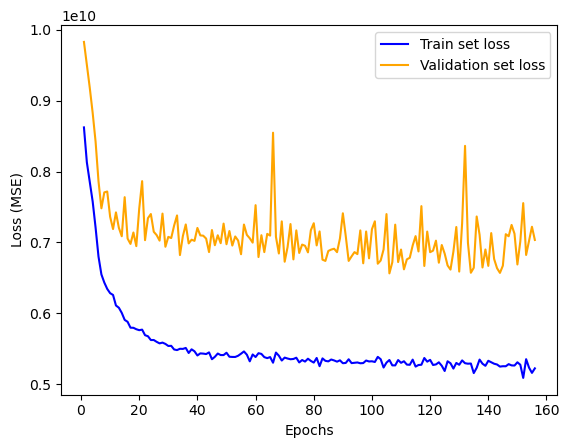

In [24]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

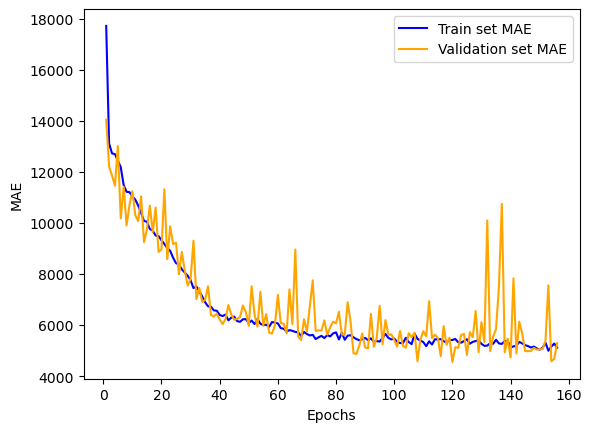

In [25]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [23]:
print (epochs)

range(1, 301)


### Save the model

In [23]:
#ann.save('Profile_ANN_model_1.h5')

## Part 5 - Make predictions

In [9]:
#ann = load_model('Profile_ANN_model_1.h5')

3077/3077 [==============================] - 5s 2ms/step


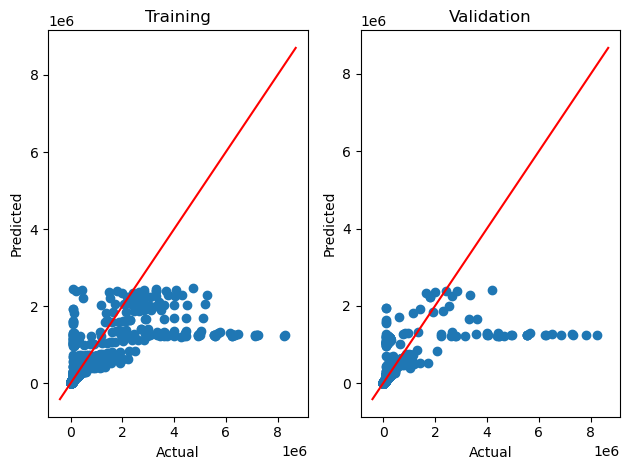

In [26]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [37]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3077/3077 [==============================] - 5s 2ms/step
[[107203.12 100586.38]
 [100056.55  99539.41]
 [ 68947.55  66058.25]
 ...
 [ 98322.1   97004.73]
 [ 78299.25  79968.45]
 [ 98692.3  100345.09]]


Text(0, 0.5, 'Predicted data')

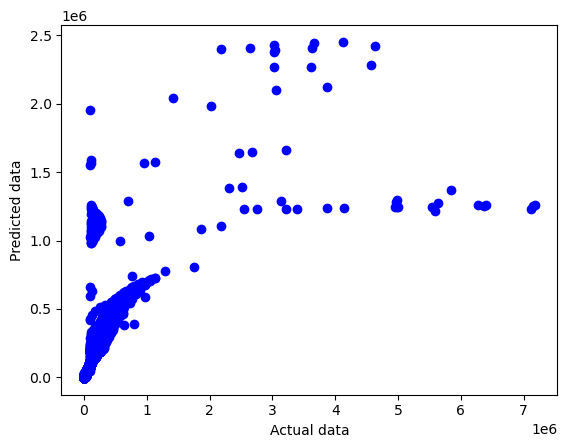

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ( color = "red")
plt.axis ()
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

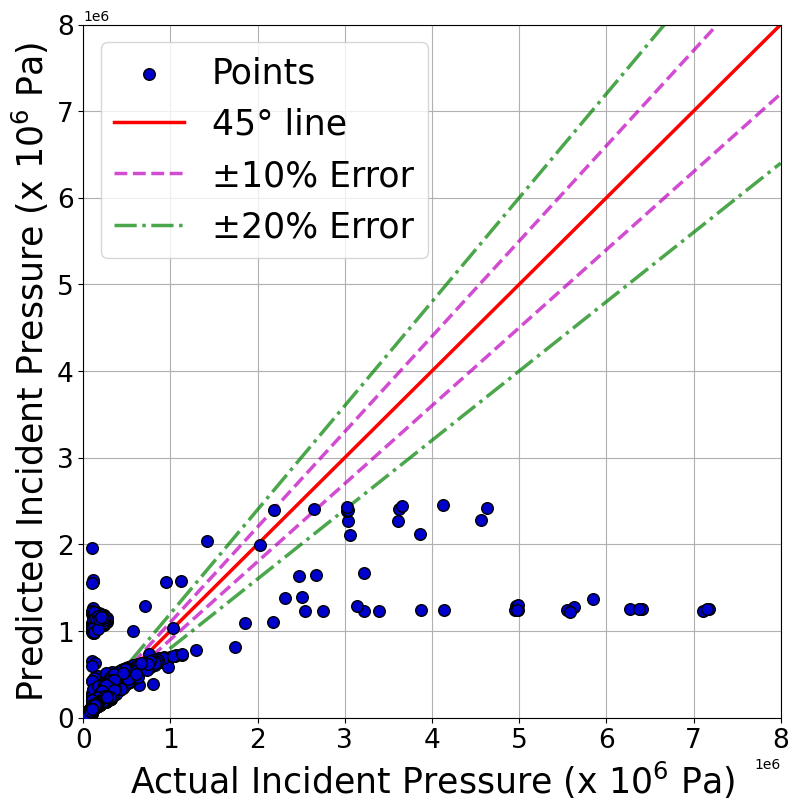

In [29]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Incident Pressure (x $10^6$ Pa)',fontsize = 25)
plt.xlabel('Actual Incident Pressure (x $10^6$ Pa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,8000000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000000)
plt.xlim(0, 8000000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [30]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

9230/9230 [==============================] - 15s 2ms/step
5201.963266389804
5166.067801505648


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.44576238660085177


In [32]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.43538066458351654


In [33]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 96.46%
Within 20% margin 97.94%
Out of 20% margin 2.06%


In [34]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.44573986531381227


In [35]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

72098.55464972358

In [36]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

5166.067801505648